In [26]:
from urllib.request import urlopen
import json
import re
import string
import concurrent.futures
import urllib
import matplotlib.pyplot as plt

import nltk
from langdetect import detect
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 
import numpy as np
import pandas as pd
import os
from functools import reduce
from glob import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD

In [4]:
df = pd.read_csv('vaccTotal.csv')
df.head()

,raw,prepared
0,"{'id': '34551956', 'premium': False, 'billing_...","['услов', 'соблюден', 'гарант', 'трудов', 'зак..."
1,"{'id': '34551957', 'premium': False, 'billing_...","['обязан', 'консультирован', 'покупател', 'пре..."
2,"{'id': '34551958', 'premium': False, 'billing_...","['обязан', 'выгрузк', 'товар', 'подсобн', 'раб..."
3,"{'id': '34551959', 'premium': False, 'billing_...","['обязан', 'управлен', 'работ', 'магазин', 'мо..."
4,"{'id': '34551960', 'premium': False, 'billing_...","['производствен', 'подразделен', 'наш', 'компа..."


In [5]:
df['prepared'].values
for index, row in df.iterrows():
    s = row['prepared'].replace('[', "")
    s = s.replace(']', "")
    s = s.replace('\'', "")
    s = s.split(', ')
    s = ' '.join(map(str, s)) 
    row['prepared'] = s
    
df['prepared']

0        услов соблюден гарант трудов законодательств р...
1        обязан консультирован покупател представлен бр...
2        обязан выгрузк товар подсобн работ требован оп...
3        обязан управлен работ магазин мониторинг контр...
4        производствен подразделен наш компан работ тре...
                               ...                        
10953    консультант SAP логистик требован оп работ вне...
10954    консультант SAP логистик требован оп работ вне...
10955    консультант SAP логистик требован оп работ вне...
10956    консультант SAP логистик требован оп работ вне...
10957    уважа кандидат связ ситуац рынк труд компан ди...
Name: prepared, Length: 10958, dtype: object

In [6]:
vectorizer = CountVectorizer(encoding='utf-16', ngram_range=(1,2), min_df=2)

In [7]:
bow = vectorizer.fit_transform(df['prepared'])
print(bow.todense())
bow.shape

[[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(10958, 136329)

In [8]:
vectorizer.vocabulary_

{'услов': 127382,
 'соблюден': 112848,
 'гарант': 29481,
 'трудов': 124792,
 'законодательств': 40553,
 'рф': 106890,
 'трудоустройств': 124874,
 'согласн': 113442,
 'тк': 122393,
 'перв': 79565,
 'дня': 34651,
 'официальн': 78163,
 'бел': 20492,
 'заработн': 41685,
 'плат': 81881,
 '50': 2235,
 '000': 242,
 'gross': 7506,
 'удобн': 125602,
 'график': 31434,
 'работ': 97372,
 'пн': 82468,
 'чт': 133696,
 '09': 405,
 '00': 0,
 '18': 970,
 'пятниц': 97326,
 '15': 780,
 '30': 1772,
 'оплачива': 73625,
 'отпуск': 77061,
 '28': 1712,
 'дне': 34489,
 'больничн': 21434,
 'лист': 57319,
 'мест': 60730,
 'химк': 131190,
 'шосс': 134033,
 'ряд': 107432,
 'шереметьев': 133885,
 'гарантирова': 29549,
 'доход': 37034,
 'задержек': 39898,
 'плюс': 82405,
 'премиальн': 89936,
 'вознагражден': 26245,
 'регулярн': 103625,
 'корпоративн': 54689,
 'обучен': 70240,
 'транспорт': 123533,
 'ст': 117161,
 'лобн': 57654,
 'зеленоград': 42562,
 'речн': 105023,
 'вокза': 26367,
 'клин': 50005,
 'добровольн': 34

In [9]:
bow.shape

(10958, 136329)

In [10]:
df = df.assign(**{'CountVectorizer': list(bow)})
df.head()

,raw,prepared,CountVectorizer
0,"{'id': '34551956', 'premium': False, 'billing_...",услов соблюден гарант трудов законодательств р...,"(0, 127382)\t1\n (0, 112848)\t1\n (0, 2948..."
1,"{'id': '34551957', 'premium': False, 'billing_...",обязан консультирован покупател представлен бр...,"(0, 127382)\t1\n (0, 106890)\t1\n (0, 1223..."
2,"{'id': '34551958', 'premium': False, 'billing_...",обязан выгрузк товар подсобн работ требован оп...,"(0, 127382)\t1\n (0, 31434)\t1\n (0, 97372..."
3,"{'id': '34551959', 'premium': False, 'billing_...",обязан управлен работ магазин мониторинг контр...,"(0, 127382)\t1\n (0, 122393)\t1\n (0, 4168..."
4,"{'id': '34551960', 'premium': False, 'billing_...",производствен подразделен наш компан работ тре...,"(0, 127382)\t1\n (0, 112848)\t1\n (0, 1068..."


In [11]:
with open('CountVectorizer.pkl', 'wb') as fp:
    pickle.dump(bow, fp)

In [12]:
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True)
tfidf = tfidf_vectorizer.fit_transform(df['prepared'])
tfidf_vectorizer.vocabulary_

{'услов': 31787,
 'соблюден': 29093,
 'гарант': 13551,
 'трудов': 31225,
 'законодательств': 15804,
 'рф': 27882,
 'трудоустройств': 31240,
 'согласн': 29150,
 'тк': 30799,
 'перв': 23434,
 'дня': 14794,
 'официальн': 23059,
 'бел': 11336,
 'заработн': 16010,
 'плат': 23967,
 '50': 749,
 '000': 1,
 'gross': 4381,
 'удобн': 31483,
 'график': 14038,
 'работ': 26567,
 'пн': 24068,
 'чт': 33141,
 '09': 63,
 '00': 0,
 '18': 250,
 'пятниц': 26537,
 '15': 184,
 '30': 541,
 'оплачива': 22434,
 'отпуск': 22947,
 '28': 489,
 'дне': 14772,
 'больничн': 11652,
 'лист': 19105,
 'мест': 19906,
 'химк': 32608,
 'шереметьевск': 33260,
 'шосс': 33337,
 'ряд': 27935,
 'шереметьев': 33259,
 'гарантирова': 13557,
 'доход': 15127,
 'задержек': 15714,
 'плюс': 24051,
 'премиальн': 25340,
 'вознагражден': 12810,
 'регулярн': 27201,
 'корпоративн': 18373,
 'обучен': 22004,
 'транспорт': 31045,
 'ст': 29658,
 'лобн': 19165,
 'зеленоград': 16205,
 'речн': 27479,
 'вокза': 12839,
 'клин': 17669,
 'талд': 30356,


In [13]:
tfidf.todense()[0]

matrix([[0.06873005, 0.04676985, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [14]:
tfidf.shape

(10958, 34135)

In [15]:
df = df.assign(**{'TfIdf': list(tfidf)})
df.head()

,raw,prepared,CountVectorizer,TfIdf
0,"{'id': '34551956', 'premium': False, 'billing_...",услов соблюден гарант трудов законодательств р...,"(0, 127382)\t1\n (0, 112848)\t1\n (0, 2948...","(0, 29961)\t0.051027377787923316\n (0, 2276..."
1,"{'id': '34551957', 'premium': False, 'billing_...",обязан консультирован покупател представлен бр...,"(0, 127382)\t1\n (0, 106890)\t1\n (0, 1223...","(0, 26588)\t0.11090118213058842\n (0, 30659..."
2,"{'id': '34551958', 'premium': False, 'billing_...",обязан выгрузк товар подсобн работ требован оп...,"(0, 127382)\t1\n (0, 31434)\t1\n (0, 97372...","(0, 21132)\t0.18713460612475366\n (0, 22678..."
3,"{'id': '34551959', 'premium': False, 'billing_...",обязан управлен работ магазин мониторинг контр...,"(0, 127382)\t1\n (0, 122393)\t1\n (0, 4168...","(0, 27730)\t0.116782546703912\n (0, 19921)\..."
4,"{'id': '34551960', 'premium': False, 'billing_...",производствен подразделен наш компан работ тре...,"(0, 127382)\t1\n (0, 112848)\t1\n (0, 1068...","(0, 14358)\t0.20729797629707802\n (0, 21681..."


In [16]:
with open('TfIdf.pkl', 'wb') as fp:
    pickle.dump(tfidf, fp)

In [17]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

E:\Programming\anaconda\envs\ml_labs\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


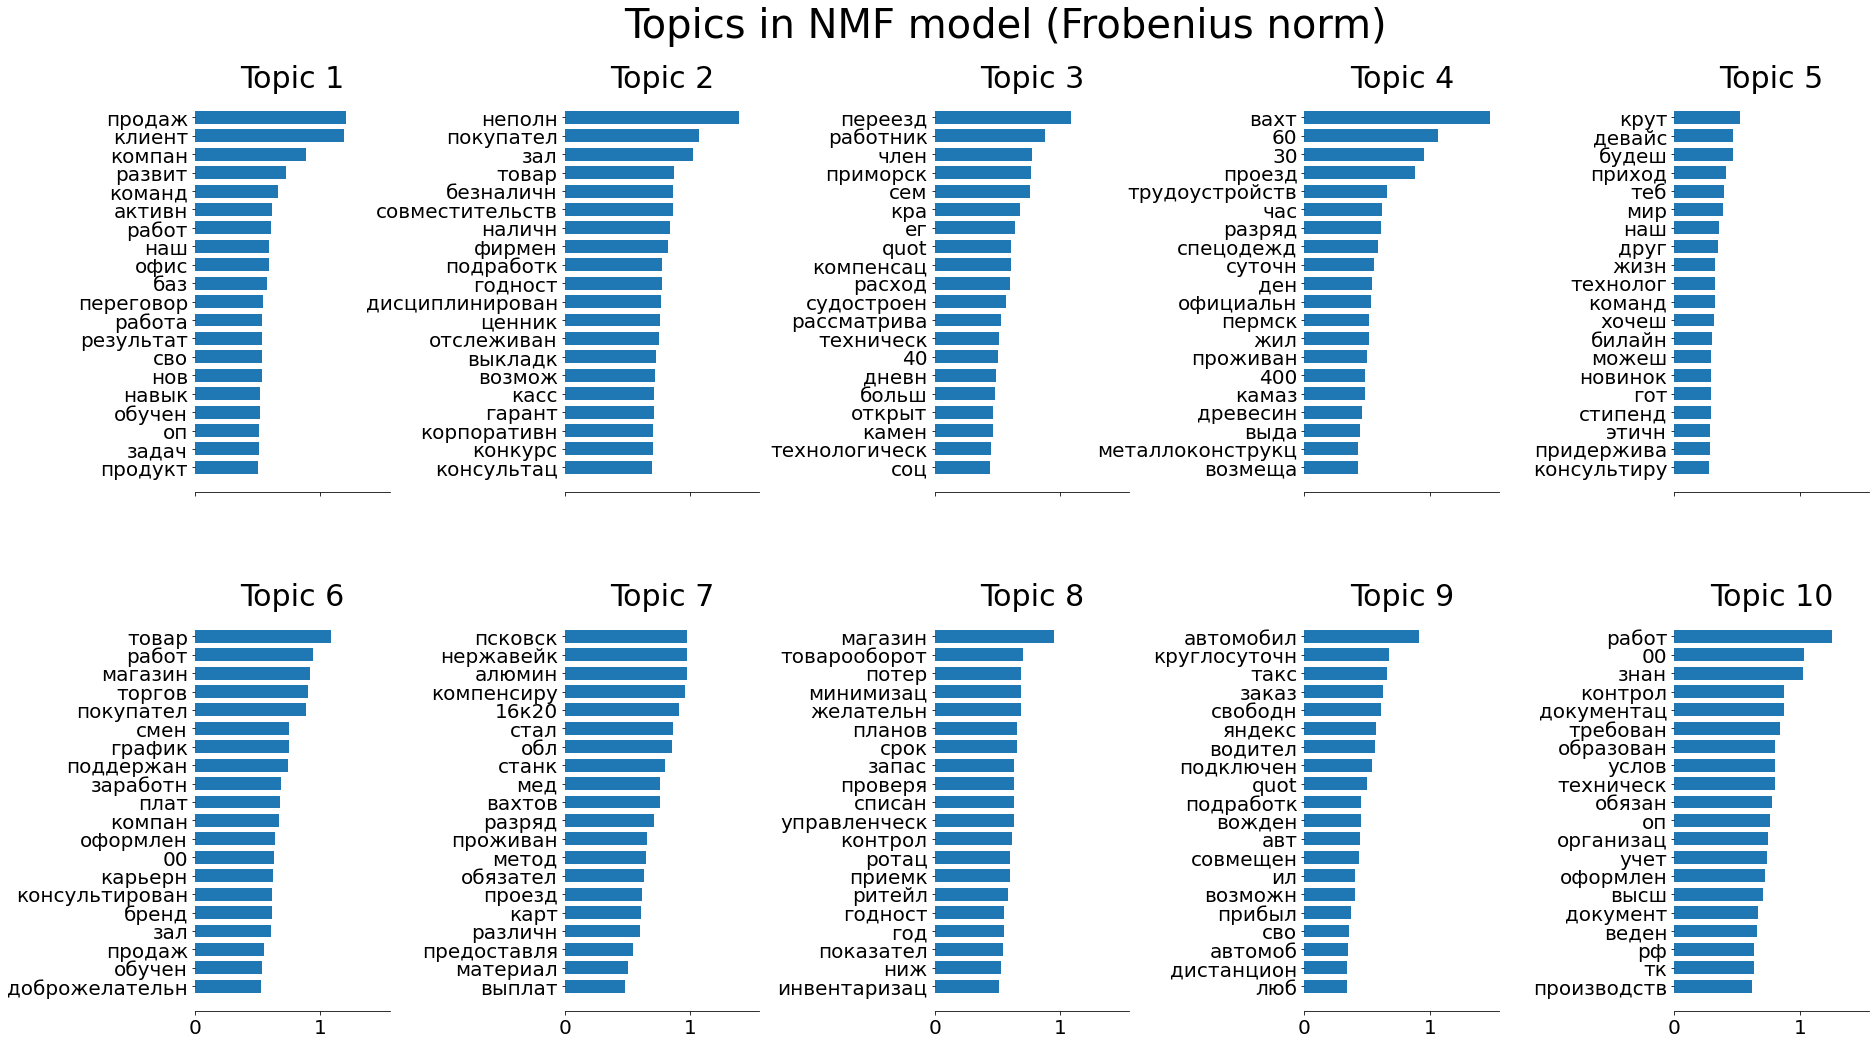

In [22]:
nmf = NMF(n_components=10, random_state=1, alpha=0.1, l1_ratio=0.5).fit(tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(
    nmf, tfidf_feature_names, 20, "Topics in NMF model (Frobenius norm)"
)

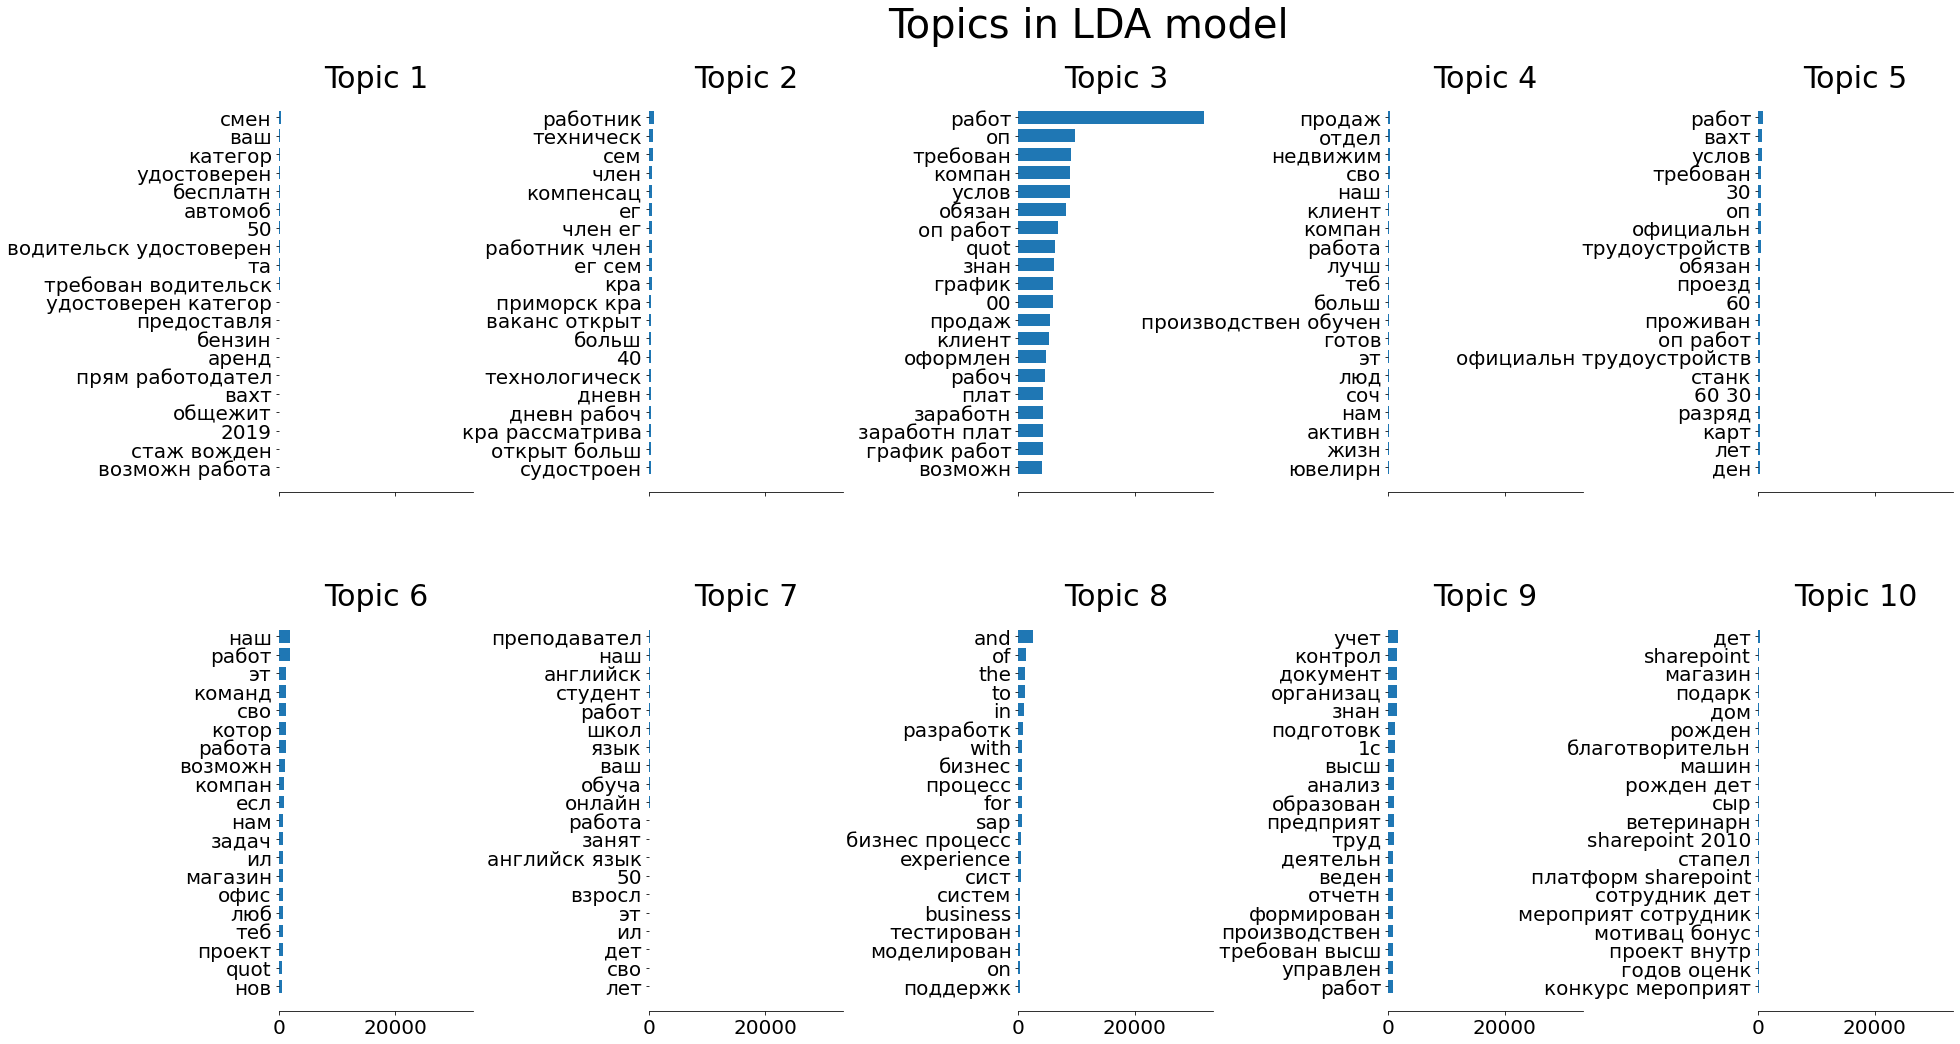

In [25]:
lda = LatentDirichletAllocation(
    n_components=10,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(bow)

tf_feature_names = vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, 20, "Topics in LDA model")